In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# --- When to Use Label Encoding ---
# Label Encoding is used to convert categorical labels (non-numeric data) into a numeric format.
# This is a necessary preprocessing step for many machine learning algorithms that can only work with numerical data.
#
# --- Requirements ---
# - It is best suited for 'ordinal' variables, where the categories have a natural order or ranking (e.g., 'small', 'medium', 'large').
# - If used on 'nominal' variables (categories with no intrinsic order, like 'red', 'green', 'blue'), the model might incorrectly
#   assume a relationship between categories based on their assigned numbers (e.g., green > red). For nominal data,
#   One-Hot Encoding is often a better choice.
# - The input data must be a 1D array-like structure (like a pandas Series or a single column of a DataFrame).



In [3]:
# 1. Load a sample dataset
# We'll use the 'wine' dataset from scikit-learn, which is a classic dataset for classification tasks.
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# For demonstration, we'll create a categorical feature from a continuous one.
# Let's categorize 'proline' into 'Low', 'Medium', and 'High' to simulate a typical categorical feature.
# This will be our target column for encoding.
wine_df['proline_category'] = pd.qcut(wine_df['proline'], q=3, labels=['Low', 'Medium', 'High'])

print("Original DataFrame with the new categorical feature:")
print(wine_df[['proline', 'proline_category']].head())
print("\n" + "="*50 + "\n")




Original DataFrame with the new categorical feature:
   proline proline_category
0   1065.0             High
1   1050.0             High
2   1185.0             High
3   1480.0             High
4    735.0           Medium




In [4]:
# 2. Select the feature to work with
# We will apply Label Encoding to the 'proline_category' column.
feature_to_encode = 'proline_category'




In [5]:
# 3. Apply Label Encoding
# Initialize the LabelEncoder
le = LabelEncoder()

# Create a new column with the encoded data
# The fit_transform() method fits the encoder to the data (learns the unique categories)
# and then transforms the data into numerical labels.
encoded_column_name = f'{feature_to_encode}_encoded'
wine_df[encoded_column_name] = le.fit_transform(wine_df[feature_to_encode])

# You can see the mapping of original labels to the new numeric labels
print("Mapping of original labels to encoded numbers:")
# le.classes_ shows the original labels, and the numbers correspond to their index.
for i, cls in enumerate(le.classes_):
    print(f"'{cls}' -> {i}")
print("\n" + "="*50 + "\n")




Mapping of original labels to encoded numbers:
'High' -> 0
'Low' -> 1
'Medium' -> 2




In [6]:
# 4. Show the result
# Display the head of the DataFrame to compare the original and encoded columns.
print("DataFrame head with original and encoded columns:")
print(wine_df[[feature_to_encode, encoded_column_name]].head())
print("\n" + "="*50 + "\n")




DataFrame head with original and encoded columns:
  proline_category  proline_category_encoded
0             High                         0
1             High                         0
2             High                         0
3             High                         0
4           Medium                         2




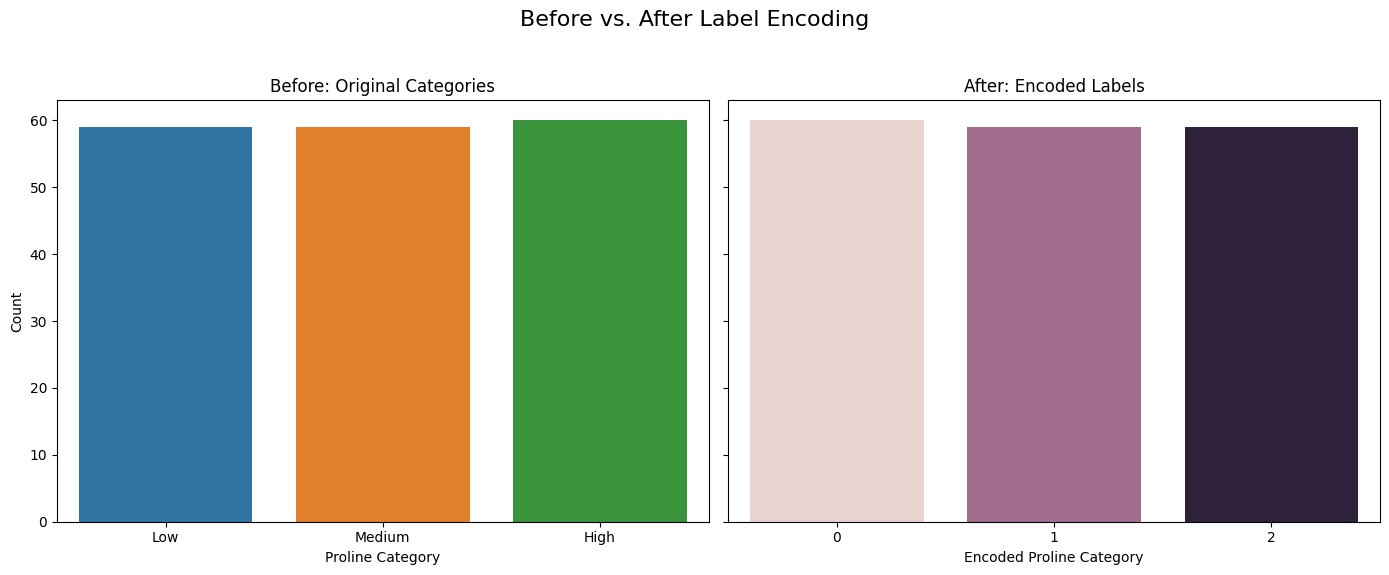

In [7]:
# 5. Create a before-and-after visualization
# A count plot (bar chart) is a great way to visualize the distribution of categorical data.
# This helps confirm that the encoding simply changed the labels, not the underlying distribution of categories.

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle('Before vs. After Label Encoding', fontsize=16)

# Before Transformation
sns.countplot(ax=axes[0], x=feature_to_encode, data=wine_df, hue=feature_to_encode, legend=False, order=['Low', 'Medium', 'High'])
axes[0].set_title('Before: Original Categories')
axes[0].set_xlabel('Proline Category')
axes[0].set_ylabel('Count')

# After Transformation
sns.countplot(ax=axes[1], x=encoded_column_name, data=wine_df, hue=encoded_column_name, legend=False)
axes[1].set_title('After: Encoded Labels')
axes[1].set_xlabel('Encoded Proline Category')
axes[1].set_ylabel('') # Hide y-label for the second plot




plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()